In [66]:
# IMPORTS
import numpy as np
from typing import Callable, List
import matplotlib
import matplotlib.pyplot as plt

In [36]:
ArrayFunction = Callable[[np.ndarray], np.ndarray]  # Definimos un alias para simplificar todo
Chain = List[ArrayFunction]  # Definimos una lista de funciones, para definir la función compuesta luego                         

In [14]:
def square(x: np.ndarray) -> np.ndarray:
    return np.power(x, 2)

In [5]:
def leaky_relu(x: np.array) -> np.array:
    return np.maximum(x * 0.2, x)

In [10]:
# Derivada de una función real de variable real, pero que le podemos
# pasar un array si queremos que calcule las imágenes del array entero
def derivada(funcion: Callable[[np.ndarray], np.ndarray],
             input: np.ndarray,
             delta: float = 0.001) -> np.ndarray:
    # Evaluates the derivative of a function "func" at every element in the input_" array.
    return (funcion(input + delta) - funcion(input - delta)) / (2 * delta)

In [11]:
# Ejemplo... función y = x2
# La derivada es y' = 2x
def x_al_cuadrado(input: np.ndarray) -> np.ndarray:
    return np.power(input, 2)

In [31]:
x = np.array([2., 3., 4.])
x_al_cuadrado(x)

array([ 4.,  9., 16.])

In [28]:
derivada(x_al_cuadrado, x)

array([2., 4., 6.])

In [29]:
# Ejemplo... función y = x3
# La derivada es y' = 3x2
def x_al_cubo(input: np.ndarray) -> np.ndarray:
    return np.power(input, 3)

In [33]:
derivada(x_al_cubo, x)

array([12.000001, 27.000001, 48.000001])

In [47]:
def funcion_compuesta(chain: Chain, input: np.ndarray) -> np.ndarray:
    valor = input
    for funcion in chain:
        valor = funcion(valor)
    return valor

In [50]:
# test
def f1(input: np.ndarray) -> np.ndarray:  # 2x + 1
    return 2 * input + 1

def f2(input: np.ndarray) -> np.ndarray:  # x2
    return np.power(input, 2)

In [51]:
chain_1 : Chain = [f2, f1]
# f1 o f2 = 2x2 + 1
funcion_compuesta(chain_1, x)

array([ 9., 19., 33.])

In [49]:
chain_2 : Chain = [f1, f2]
# f2 o f1 = 4x2 + 4x + 1
funcion_compuesta(chain_2, x)

array([25., 49., 81.])

In [84]:
def sigmoid(input: np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-input))

In [55]:
def derivada_funcion_compuesta_v0(chain: Chain, input: np.ndarray) -> np.ndarray:
    assert len(chain) == 2, "This function requires 'Chain' objects of length 2"
    f1, f2 = chain
    f1_x = f1(input)
    df1_x = derivada(f1, input)
    df2_u = derivada(f2, f1_x)
    return df1_x * df2_u

In [60]:
def derivada_funcion_compuesta(chain: Chain, input: np.ndarray) -> np.ndarray:
    nuevo_x = input
    valor_derivada = 1
    for funcion in chain:
        imagen = funcion(nuevo_x)
        valor_derivada *= derivada(funcion, nuevo_x)
        nuevo_x = imagen
        
    return valor_derivada

In [59]:
chain_1 : Chain = [f2, f1]
# f1 o f2 = 2x2 + 1
# derivada es 4x
derivada_funcion_compuesta(chain_1, x)

array([ 8., 12., 16.])

In [61]:
chain_2 : Chain = [f1, f2]
# f2 o f1 = 4x2 + 4x + 1
# derivada es 8x + 4
derivada_funcion_compuesta(chain_2, x)

array([20., 28., 36.])

In [132]:
# Hagamos unas gráficas a modo de comprobación
PLOT_RANGE = np.arange(-3, 3, 0.01)
chain_1 = [square, sigmoid]
chain_2 = [sigmoid, square]
chain_3 = [leaky_relu, sigmoid, square]

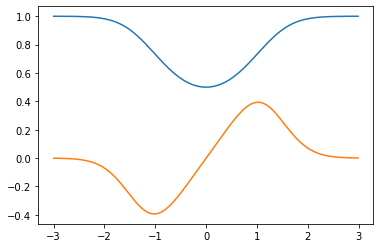

In [130]:
plt.plot(PLOT_RANGE, funcion_compuesta(chain_1, PLOT_RANGE))
plt.plot(PLOT_RANGE, derivada_funcion_compuesta(chain_1, PLOT_RANGE))

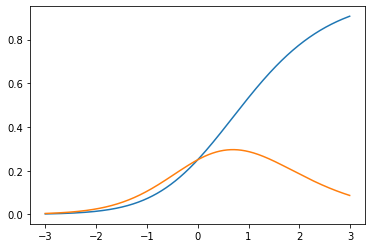

In [131]:
plt.plot(PLOT_RANGE, funcion_compuesta(chain_2, PLOT_RANGE))
plt.plot(PLOT_RANGE, derivada_funcion_compuesta(chain_2, PLOT_RANGE))

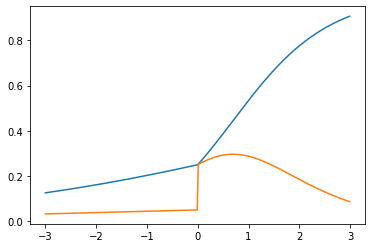

In [133]:
plt.plot(PLOT_RANGE, funcion_compuesta(chain_3, PLOT_RANGE))
plt.plot(PLOT_RANGE, derivada_funcion_compuesta(chain_3, PLOT_RANGE))